<a href="https://colab.research.google.com/github/adrian-pieroni/AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [19]:
suma= tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

In [21]:
facturacion_tiendas = {
    "tienda1": suma,
    "tienda 2": suma2,
    "tienda 3": suma3,
    "tienda4": suma4,
}

mayor_facturacion = 0
tienda_mayor_facturacion = ""

for tienda, facturacion in facturacion_tiendas.items():
    if facturacion > mayor_facturacion:
        mayor_facturacion = facturacion
        tienda_mayor_facturacion = tienda

print(f"La tienda con la mayor facturación es: {tienda_mayor_facturacion} con un total de: ${mayor_facturacion}")


La tienda con la mayor facturación es: tienda1 con un total de: $1150880400.0


# 2. Ventas por categoría

In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría del producto, contando las ventas
conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar la categoría más popular por tienda
categoria_mas_popular = conteo_por_tienda_categoria.loc[conteo_por_tienda_categoria.groupby('Tienda')['Cantidad de Ventas'].idxmax()]

print("Cantidad de productos vendidos por categoría en cada tienda:")
print(conteo_por_tienda_categoria)

print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)

Cantidad de productos vendidos por categoría en cada tienda:
      Tienda   Categoría del Producto  Cantidad de Ventas
0   Tienda 1  Artículos para el hogar                 171
1   Tienda 1     Deportes y diversión                 284
2   Tienda 1        Electrodomésticos                 312
3   Tienda 1             Electrónicos                 448
4   Tienda 1   Instrumentos musicales                 182
5   Tienda 1                 Juguetes                 324
6   Tienda 1                   Libros                 173
7   Tienda 1                  Muebles                 465
8   Tienda 2  Artículos para el hogar                 181
9   Tienda 2     Deportes y diversión                 275
10  Tienda 2        Electrodomésticos                 305
11  Tienda 2             Electrónicos                 422
12  Tienda 2   Instrumentos musicales                 224
13  Tienda 2                 Juguetes                 313
14  Tienda 2                   Libros                 197
15  Tienda 

# 3. Calificación promedio de la tienda


In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada tienda y agregar una columna para identificar la tienda
tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

print("Calificación promedio de los clientes por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio de los clientes por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


# 4. Productos más y menos vendidos

Producto más vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
1    Tienda 1                    Armario                  60
75   Tienda 2  Iniciando en programación                  65
129  Tienda 3              Kit de bancas                  57
163  Tienda 4                   Cama box                  62

Producto menos vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
4    Tienda 1  Auriculares con micrófono                  33
77   Tienda 2              Juego de mesa                  32
111  Tienda 3    Bloques de construcción                  35
175  Tienda 4         Guitarra eléctrica                  33


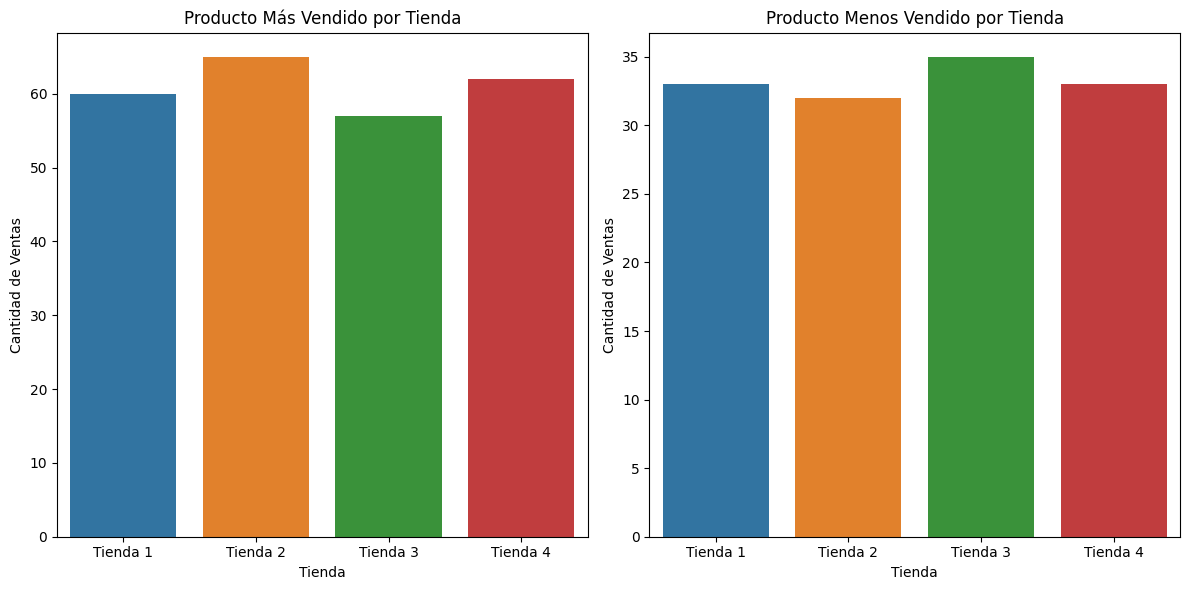

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos y agregar la columna 'Tienda' (mismo código que antes)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Contar la cantidad de ventas por producto en cada tienda
conteo_ventas_producto_tienda = ventas_totales.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar el producto más vendido y menos vendido en cada tienda
producto_mas_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmax()]
producto_menos_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmin()]

print("Producto más vendido por tienda:")
print(producto_mas_vendido)

print("\nProducto menos vendido por tienda:")
print(producto_menos_vendido)

# Visualización de los productos más y menos vendidos por tienda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_mas_vendido, legend=False)
plt.title('Producto Más Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.subplot(1, 2, 2)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_menos_vendido, legend=False)
plt.title('Producto Menos Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda